In [1]:
from generator import Pattern_generator, pattern_mixer, get_pulse_list

10
10
[-0.73156569  0.8549611   4.08183016  4.97404754  5.14334096  8.35042879
  9.89134261  8.94463664  8.57258871  7.10317401  6.2704715 ]


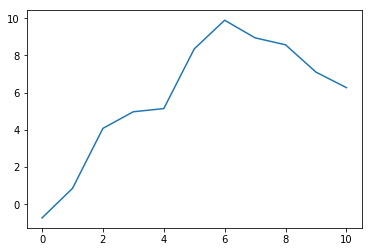

In [2]:
import timesynth as ts
import numpy as np
import math
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
%matplotlib inline

PG1 = Pattern_generator(stop_time=10, period=24, amplitude=10, std=1, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
#PG1.plot()
#PG1.plot(False)
print(PG1.series_length)
print(PG1.stop_time)
print(PG1.get_smooth_values())
# ptl = [(2000,4000),(5000,6000)]
# ml = [3,-2]
# PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = True)
PG1.plot()
# PG1.plot(False)
# PG1.bump(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = False)
# PG1.plot()
# PG1.plot(False)

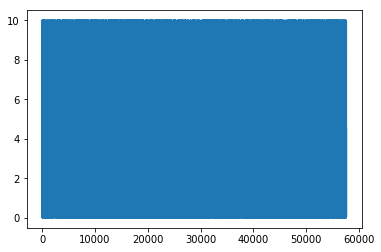

In [3]:
# GENERAL ASSUMPTION
window_size = 192
period_length = 24
N = 300
n_periods_per_window = window_size // period_length
time_series_length = window_size * N
amp = 10
std = 0.1
BASE_PATTERN = Pattern_generator(stop_time=time_series_length, period=24, amplitude=amp/2, std=std, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
BASE_PATTERN.bump_to_above_zero()
BASE_PATTERN.plot()

# DATASET NO. 1
# Potential Usage: (TBA) testing and prediction? 对照组？
# 随机选择1%的数据长度，放入起伏，对于放入位置没有过多要求 （不overlap即可），需有长短不一（短，中，长）的起伏持续长度。
# 起伏的振幅与正常周期函数相同，即，起伏处(此时可以理解为异常)为正常峰值的两倍左右。


len_ndarray:  [2 2 3]


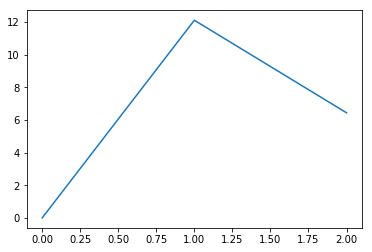

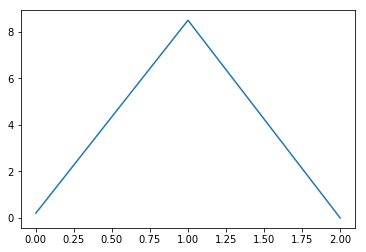

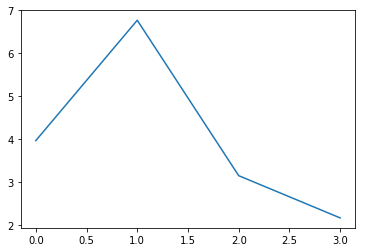

In [4]:
# ===> 设计 短 中 长 三种起伏，每种各三个
    # to make life easier, created and used two helper functions 
    # get_pulse_list 
    # inside which the other helper function, bump_to_above_zero, gets called
    
n = 3 # num_choice_for_each_pattern
# short_pattern
short_len_mean = 3
short_len_std = 0.5
short_pattern_list = get_pulse_list(num=n, length_mean=short_len_mean, length_std=short_len_std, amplitude=amp, verbose=True, plot_the_smoother_line=True)

# medium-length pattern
med_len_mean = 8
med_len_std = 1
med_pattern_list = get_pulse_list(num=n, length_mean=med_len_mean, length_std=med_len_std, amplitude=amp, verbose=False, plot_the_smoother_line=False)
# long_pattern
long_len_mean = 14
long_len_std = 2
long_pattern_list = get_pulse_list(num=n, length_mean=long_len_mean, length_std=long_len_std, amplitude=amp, verbose=False, plot_the_smoother_line=True)



In [5]:
# ===> 选择2%的数据点对应的时间节点 [0,time_series_length]，生成列表，计算各两点之间的差值，放入差值列表
    # random.sample(population, k)
    # Return a k length list of unique elements chosen from the population sequence or set. Used for random sampling without replacement.

population = list(range(time_series_length))
sample_size = int(time_series_length * 0.05)
if (sample_size % 2 != 0):
    sample_size += 1
list_chosen_x = random.sample(population=population, k = sample_size)
list_chosen_x.sort()
starting_points_list = list_chosen_x[0::2]
ending_points_list = list_chosen_x[1::2]
difference_ndarray = np.array(ending_points_list) - np.array(starting_points_list)
difference_list = difference_ndarray.tolist()

# print("list_chosen_x[:200]:\n", list_chosen_x[:200])
# print("\nstarting_points_list[:100]:\n", starting_points_list[:100])
# print("\nending_points_list[:100]:\n", ending_points_list[:100])
# print("\ndifference_list[:100]:\n", difference_list[:100])
# print("\nnumber of (start, end) pairs: ", len(difference_list))
# print("average length:", np.mean(difference_ndarray)) # around 20
# print("minimum length:", np.min(difference_ndarray)) # amost always 1
# print("maximum length:", np.max(difference_ndarray)) # usually 120+, rarely over 200
# print("ratio: ", sum(difference_list)/time_series_length) # around 0.5

In [6]:
# 满足长、中、短（优先级递减）起伏长度要求的点分别放入三个列表
    # 在每个列表内分别随机选取对应数量的起始位置
    # 若列表长度不足 从满足条件的其他列表内获得， 即 按与优先级相反的顺序分配 
    #          based on pre-coding assumption: 大部分选择均会满足最高优先级的要求）
    #          修改：有多少 放多少

# review
# print("\nstarting_points_list[:10]:\n", starting_points_list[:10])
# print("\nending_points_list[:10]:\n", ending_points_list[:10])
# print("\ndifference_list[:10]:\n", difference_list[:10])

# print("\nnumber of (start, end) pairs: ", len(difference_list))
# print("average length:", np.mean(difference_ndarray)) # around 20
# print("minimum length:", np.min(difference_ndarray)) # amost always 1
# print("maximum length:", np.max(difference_ndarray)) # usually 120+, rarely over 200
# print("ratio: ", sum(difference_list)/time_series_length) # around 0.5

assert(len(starting_points_list) == len(ending_points_list) == len(difference_list))
position_short_pulses = []
short_threshold = 6
position_med_pulses = []
med_threshold = 12
position_long_pulses = []
long_threshold = 20
for i in range(len(difference_list)):
    this_pos_tuple = (starting_points_list[i], ending_points_list[i])
    if (difference_list[i] > long_threshold):
        position_long_pulses.append(this_pos_tuple)
    elif (difference_list[i] > med_threshold):
        position_med_pulses.append(this_pos_tuple)
    elif (difference_list[i] > short_threshold):
        position_short_pulses.append(this_pos_tuple)

print("\nposition_short_pulses[:20]:\n", position_short_pulses[:20])
print("\nposition_med_pulses[:20]:\n", position_med_pulses[:20])
print("\nposition_long_pulses[:20]:\n", position_long_pulses[:20])
# print()
# print(len(position_short_pulses))
# print(len(position_med_pulses))
# print(len(position_long_pulses))
# print()
# print(len(position_short_pulses) + len(position_med_pulses) + len(position_long_pulses))

num_short_pulses = len(position_short_pulses)
num_med_pulses = len(position_med_pulses)
num_long_pulses = len(position_long_pulses)

random.shuffle(position_short_pulses)
random.shuffle(position_med_pulses)
random.shuffle(position_long_pulses)

short_range = num_short_pulses // n
med_range = num_med_pulses // n
long_range = num_long_pulses // n

random_picked_pos_for_short_list = [position_short_pulses[i*short_range:(i+1)*short_range] for i in range(n)]
random_picked_pos_for_med_list = [position_med_pulses[i*med_range:(i+1)*med_range] for i in range(n)]
random_picked_pos_for_long_list = [position_long_pulses[i*long_range:(i+1)*long_range] for i in range(n)]

# print(random_picked_pos_for_short_list)
# print(random_picked_pos_for_med_list)
# print(random_picked_pos_for_long_list)

# FINAL STEP YAY!
for i in range(n):
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = short_pattern_list[i],  position_tuple_list = random_picked_pos_for_short_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = short_pattern_list[i],  position_tuple_list = random_picked_pos_for_short_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = med_pattern_list[i],  position_tuple_list = random_picked_pos_for_med_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = med_pattern_list[i],  position_tuple_list = random_picked_pos_for_med_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = long_pattern_list[i],  position_tuple_list = random_picked_pos_for_long_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = long_pattern_list[i],  position_tuple_list = random_picked_pos_for_long_list[i], mix_the_smoother_lines = False)


position_short_pulses[:20]:
 [(35, 43), (121, 129), (442, 449), (489, 496), (667, 677), (681, 690), (692, 701), (892, 902), (1114, 1122), (1355, 1366), (1709, 1717), (2038, 2049), (2211, 2223), (2282, 2289), (2392, 2400), (2440, 2452), (2691, 2698), (3107, 3118), (3613, 3624), (3882, 3890)]

position_med_pulses[:20]:
 [(11, 29), (62, 81), (320, 334), (344, 358), (382, 395), (570, 583), (874, 889), (1429, 1445), (1912, 1926), (1952, 1971), (2017, 2036), (2337, 2354), (2374, 2391), (2500, 2515), (2585, 2603), (2659, 2677), (3040, 3056), (3084, 3098), (3285, 3304), (3685, 3698)]

position_long_pulses[:20]:
 [(130, 170), (185, 216), (243, 280), (297, 319), (587, 626), (742, 789), (817, 855), (962, 1029), (1059, 1099), (1138, 1220), (1248, 1272), (1275, 1303), (1310, 1340), (1400, 1428), (1459, 1493), (1496, 1517), (1534, 1561), (1606, 1628), (1639, 1695), (1770, 1807)]


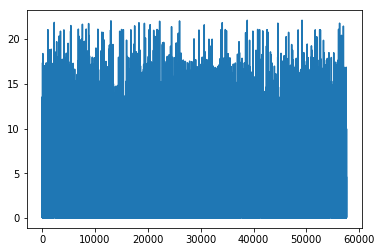

In [7]:
BASE_PATTERN.plot()

In [8]:
# previous thinking, not finished

# 每个window有一段异常值
# 变量1：开始时间 （极早) 早 中 晚 （极晚）
# 变量2：结束时间 （极早) 早 中 晚 （极晚）
# 变量3： 异常值本身的性质
#     3a: 形状： 平移 叠加sin 叠加pulse
#     3b: shift-extent （对于平移） / amplitude （对于周期性函数）
# potential research area I 尝试发现与异常值(anomaly)相关的变量对使用各种模型进行的预测的影响
